Week 3 : Clean and aggregate a dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

About the Dataset: Electric Consumption


Datetime: The date and time of the recording


Temperature: The Temperature in Celsius


Humidity: The concentration of water vapor in the air


WindSpeed: The speed of the wind in kilometers per hour


GeneralDiffuseFlows: The measurement of how much emissions gases diffuse into the broader atmosphere


DiffuseFlows	The measurement of how much emissions gases diffuse into the local atmosphere


PowerConsumption_Zone1: The power consumption in Kilowatt-Hours in Power Zone 1


PowerConsumption_Zone2: The power consumption in Kilowatt-Hours in Power Zone 2


PowerConsumption_Zone3: The power consumption in Kilowatt-Hours in Power Zone 3


In [2]:
df= pd.read_csv("D:\Datasets\Electricity consumption.csv")

In [3]:
df.shape

(52416, 9)

In [4]:
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [5]:
df.tail()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
52411,2017-12-30,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,2017-12-30,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,2017-12-30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,2017-12-30,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504
52415,2017-12-30,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820


In [7]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [8]:
df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


Checking for missing values, duplicates and outliers

In [9]:
df.isnull().sum()

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

There are No missing values in a dataset.

In [10]:
df.duplicated().sum()

np.int64(0)

There are no duplicate values in a dataset.

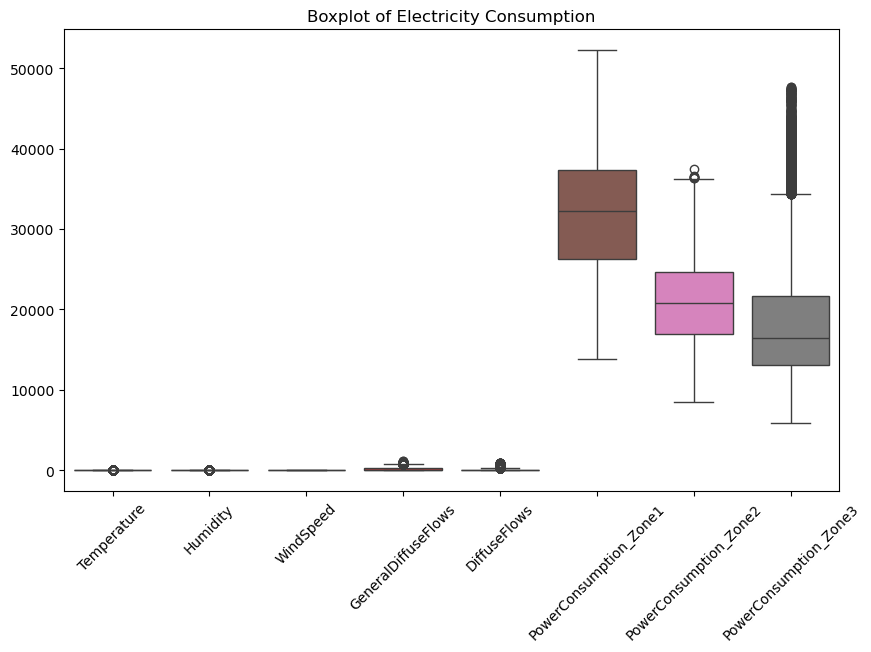

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title("Boxplot of Electricity Consumption")
plt.xticks(rotation=45)
plt.show()

The outliers shown are related to Temperature, Humidity, WindSpeed and Diffuse flows shows that there might be peak demand hours, seasonal extremes or heatwave or coldwave spikes in power consumption zones. Hence, I will not remove them and will continue to conduct the further EDA based on these values in dataset.

Univariate analysis

Statistical Summary of Dataset

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,52416.0,18.810024,5.815476,3.247000,14.410000,18.780000,22.890000,40.01000
Humidity,52416.0,68.259518,15.551177,11.340000,58.310000,69.860000,81.400000,94.80000
WindSpeed,52416.0,1.959489,2.348862,0.050000,0.078000,0.086000,4.915000,6.48300
GeneralDiffuseFlows,52416.0,182.696614,264.400960,0.004000,0.062000,5.035500,319.600000,1163.00000
DiffuseFlows,52416.0,75.028022,124.210949,0.011000,0.122000,4.456000,101.000000,936.00000
PowerConsumption_Zone1,52416.0,32344.970564,7130.562564,13895.696200,26310.668692,32265.920340,37309.018185,52204.39512
PowerConsumption_Zone2,52416.0,21042.509082,5201.465892,8560.081466,16980.766032,20823.168405,24713.717520,37408.86076
PowerConsumption_Zone3,52416.0,17835.406218,6622.165099,5935.174070,13129.326630,16415.117470,21624.100420,47598.32636


Distribution Analysis

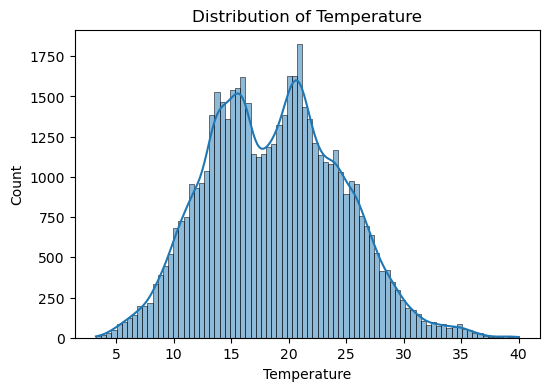

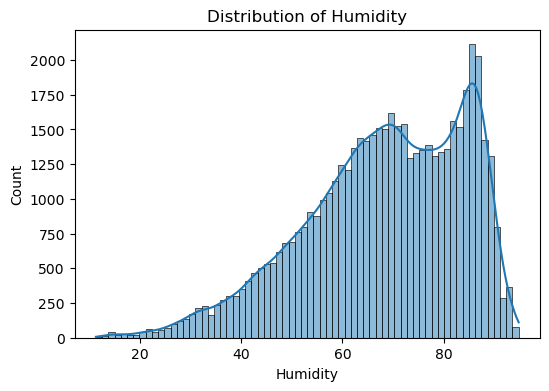

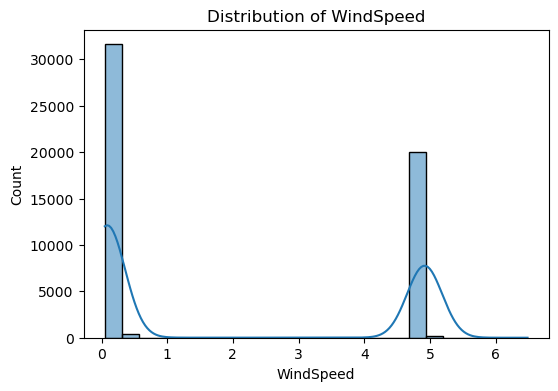

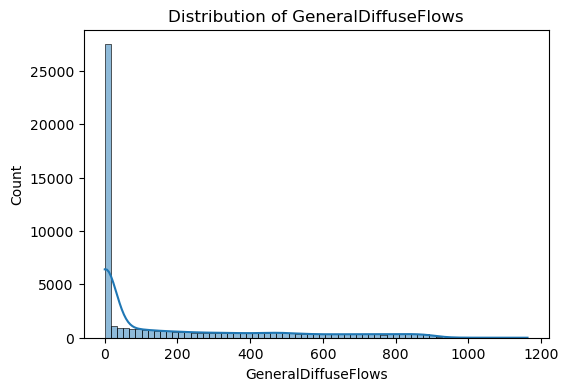

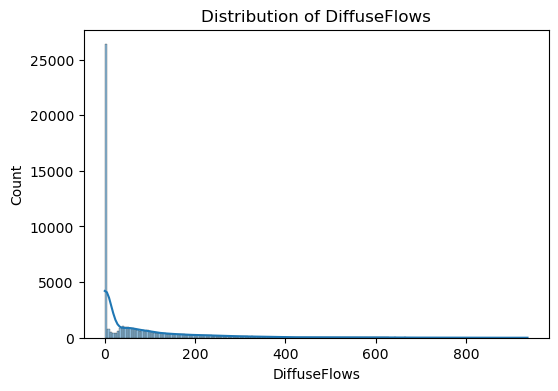

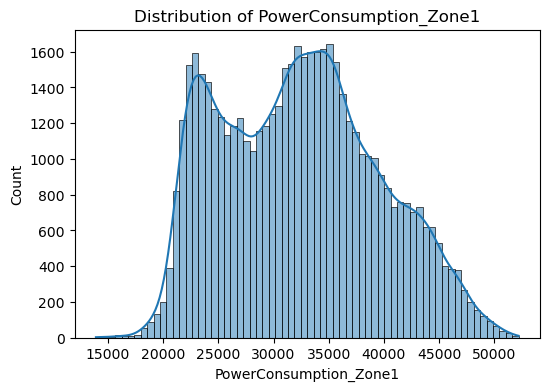

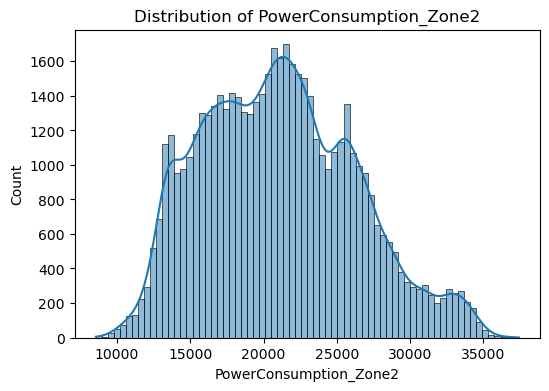

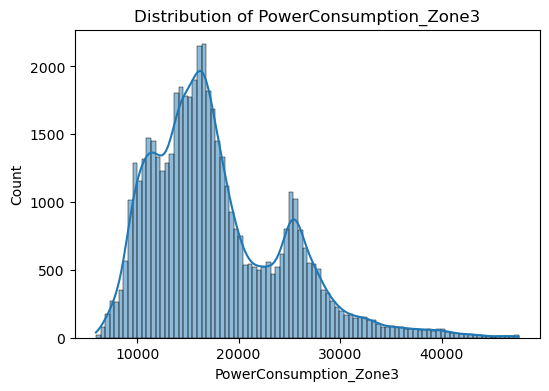

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


Boxplot Analysis

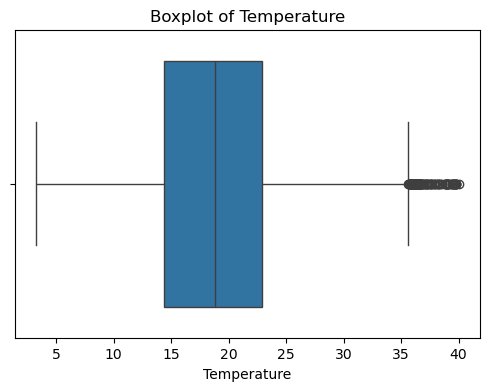

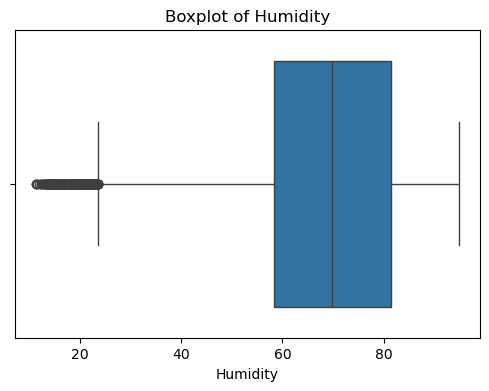

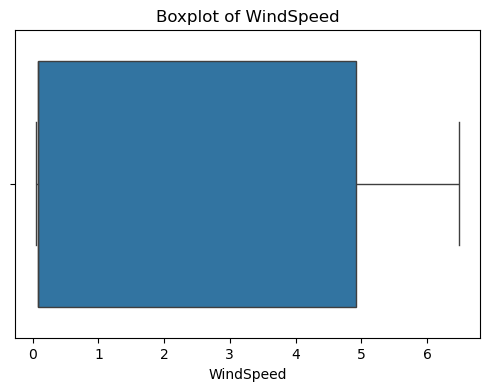

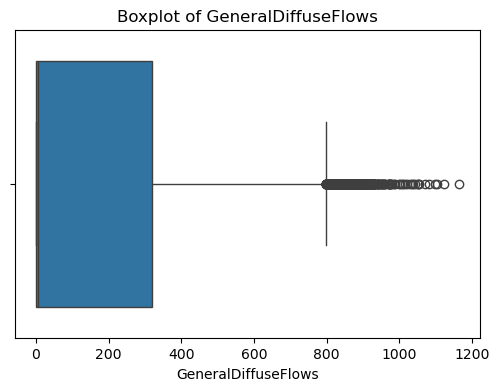

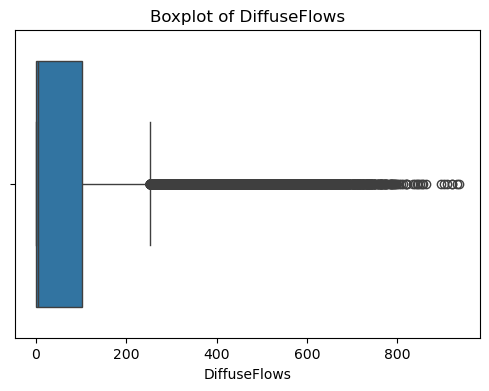

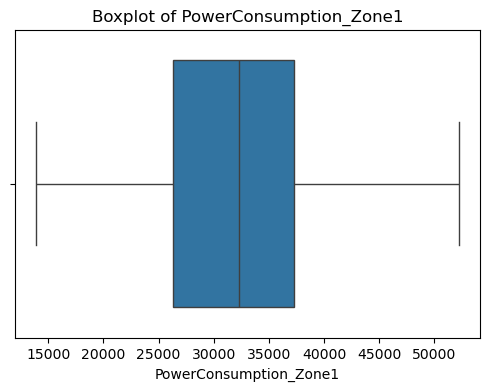

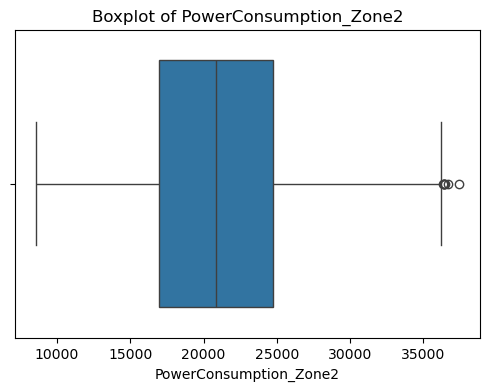

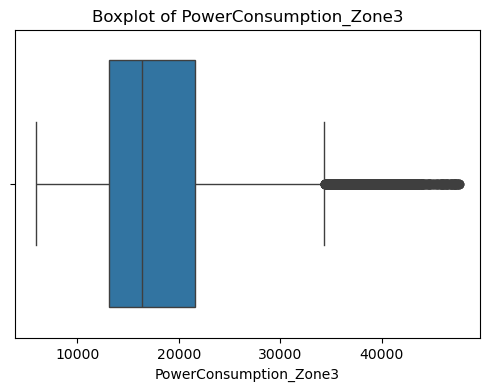

In [27]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col],data=df)
    plt.title(f"Boxplot of {col}")
    plt.show()

Density Comparison across zones

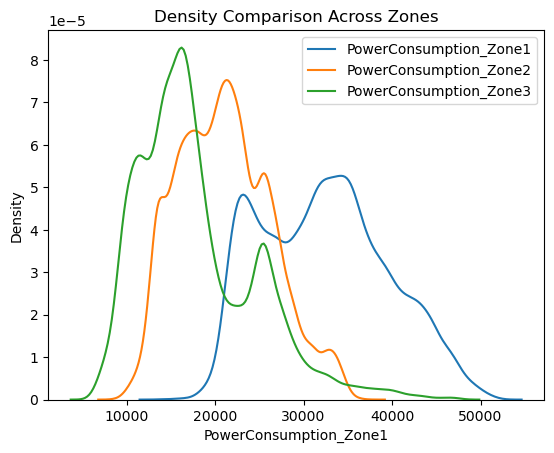

In [28]:
for col in ['PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3']:
    sns.kdeplot(df[col], label=col)

plt.legend()
plt.title("Density Comparison Across Zones")
plt.show()

Bivariate Analysis

In [29]:
df['Datetime']= pd.to_datetime(df['Datetime'])
df['Month']= df['Datetime'].dt.month_name()

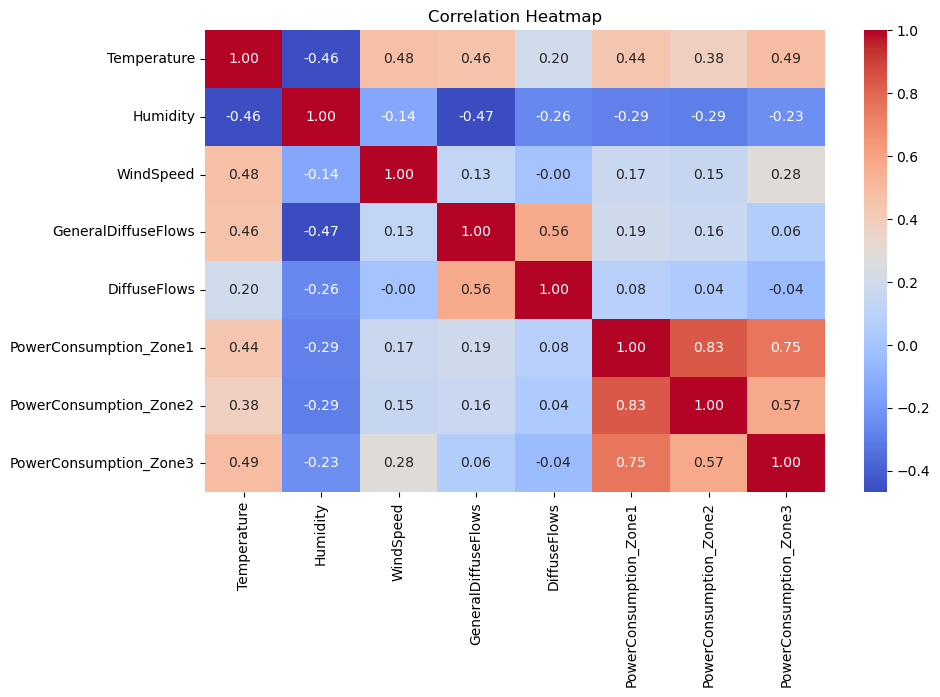

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()      

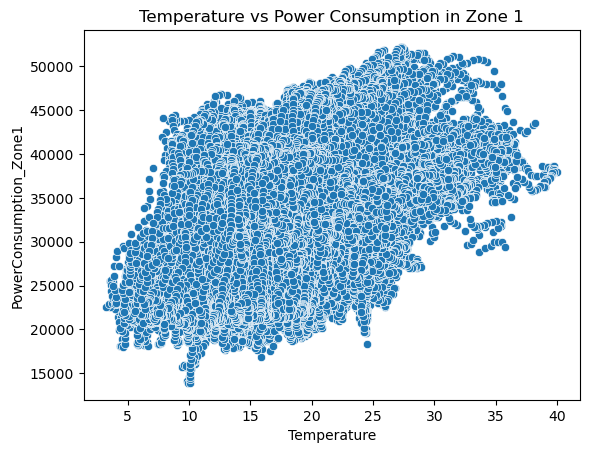

In [ ]:
sns.scatterplot(x='Temperature', y='PowerConsumption_Zone1', data=df)
plt.show()

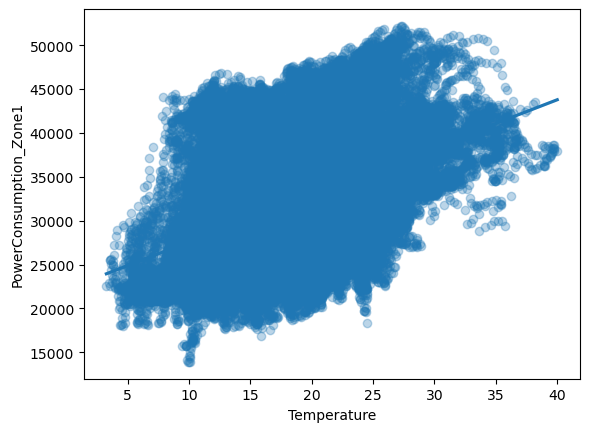

In [33]:
sns.regplot(x='Temperature', y='PowerConsumption_Zone1', data=df, scatter_kws={'alpha':0.3})
plt.show()

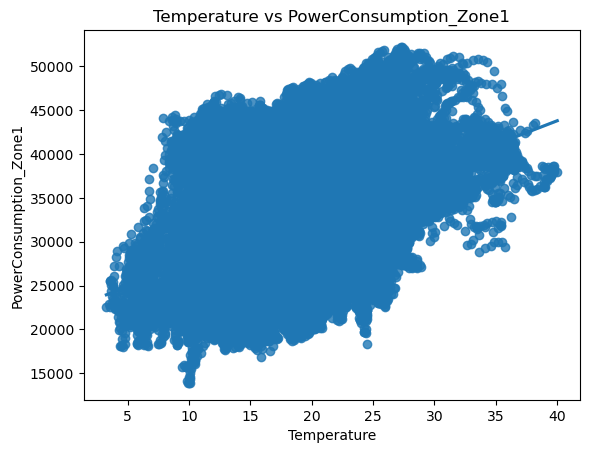

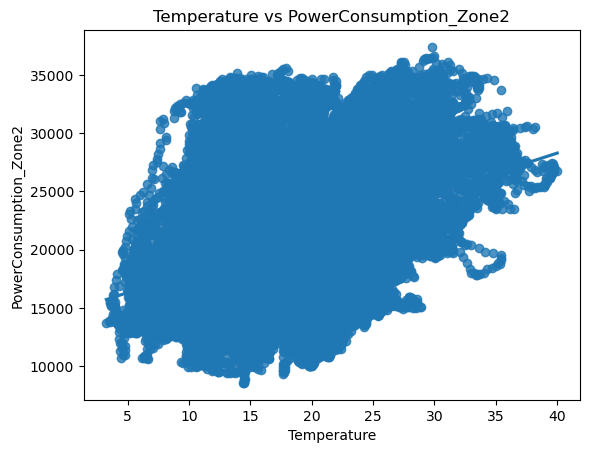

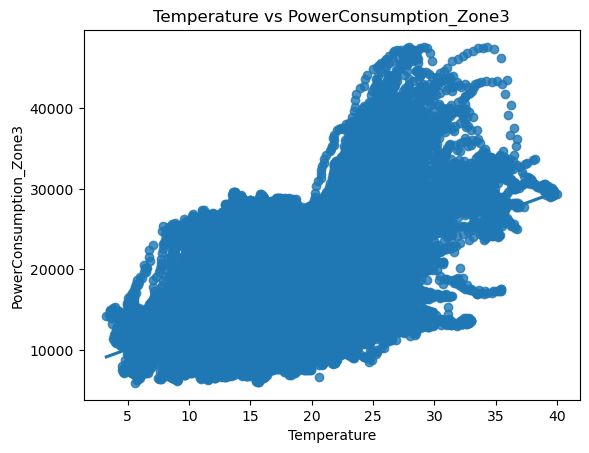

In [34]:
for zone in ['PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3']:
    sns.regplot(data=df, x='Temperature', y=zone)
    plt.title(f'Temperature vs {zone}')
    plt.show()

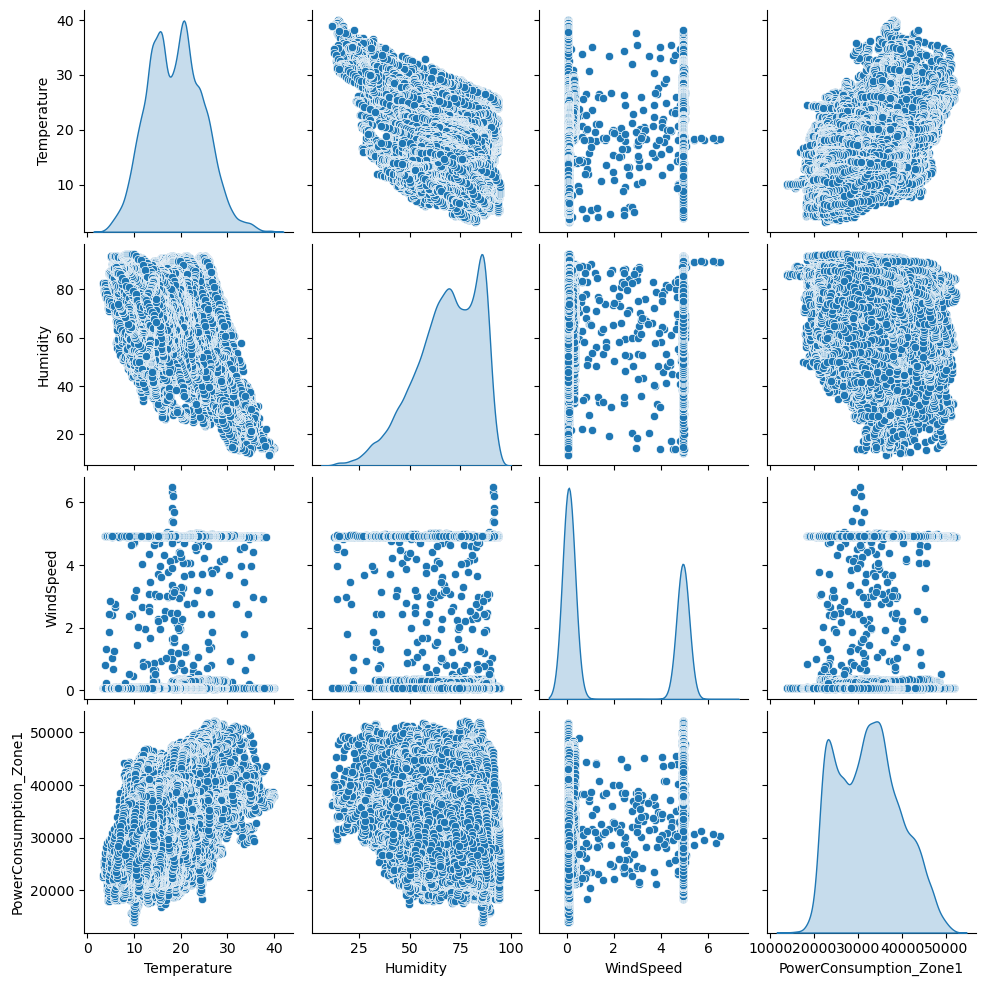

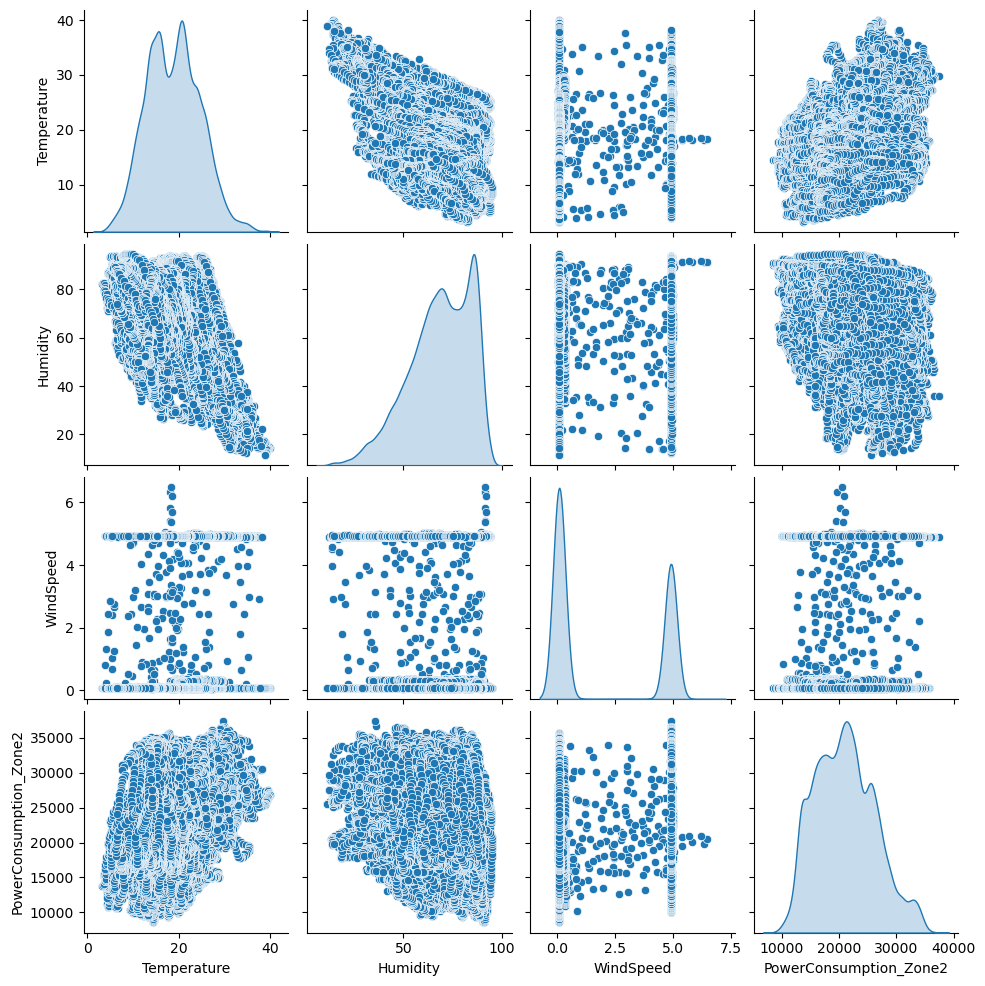

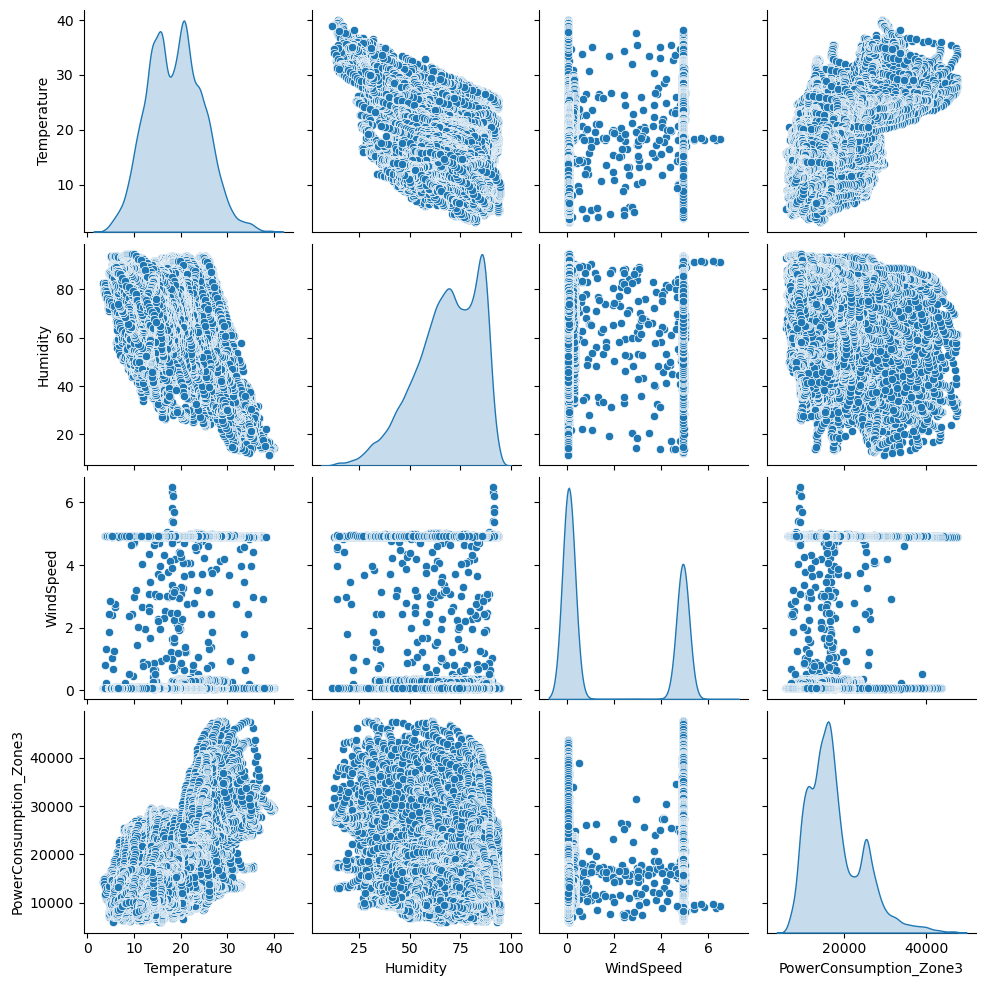

In [36]:
for zone in ['PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3']:
    sns.pairplot(df[['Temperature','Humidity','WindSpeed',
                 zone]], 
             diag_kind='kde')

Temperature shows a moderate positive correlation with power consumption across all zones, indicating increased cooling demand during warmer conditions. Humidity exhibits a nonlinear relationship, suggesting combined thermal discomfort effects. WindSpeed shows weak correlation, likely due to limited variance. Strong correlation among the three zones confirms similar consumption dynamics across regions.